In [5]:
pip install missingno


Note: you may need to restart the kernel to use updated packages.


In [54]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB

In [56]:
df = pd.read_csv(r"C:\Users\parth\OneDrive\Documents\Credit Card Risk\credit_risk_dataset.csv\credit_risk_dataset.csv")

In [58]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [60]:
#The target variable will be loan_status. *Consequently, our task is reduced to a binary classification problem

In [62]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [64]:
df.shape

(32581, 12)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [68]:
# Some columns contain categorical data. To further train the model, we need to get rid of them.

In [70]:
df['person_home_ownership'].value_counts()

person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64

In [72]:
df['loan_intent'].value_counts()

loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64

In [74]:
df['loan_grade'].value_counts()

loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: count, dtype: int64

In [76]:
df['cb_person_default_on_file'].value_counts()

cb_person_default_on_file
N    26836
Y     5745
Name: count, dtype: int64

# Data Visualization

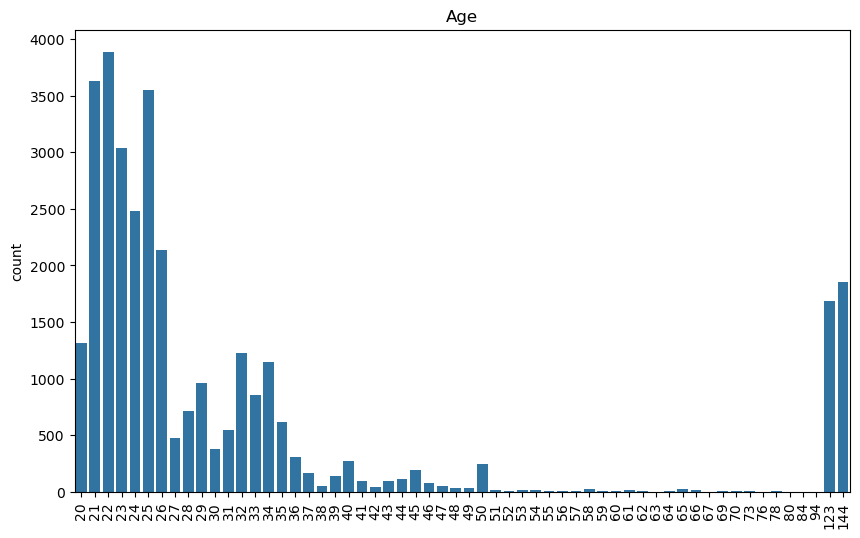

In [79]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['person_age'].unique(), y=df['person_age'].value_counts())
plt.xticks(rotation=90)
plt.title('Age')
plt.show()

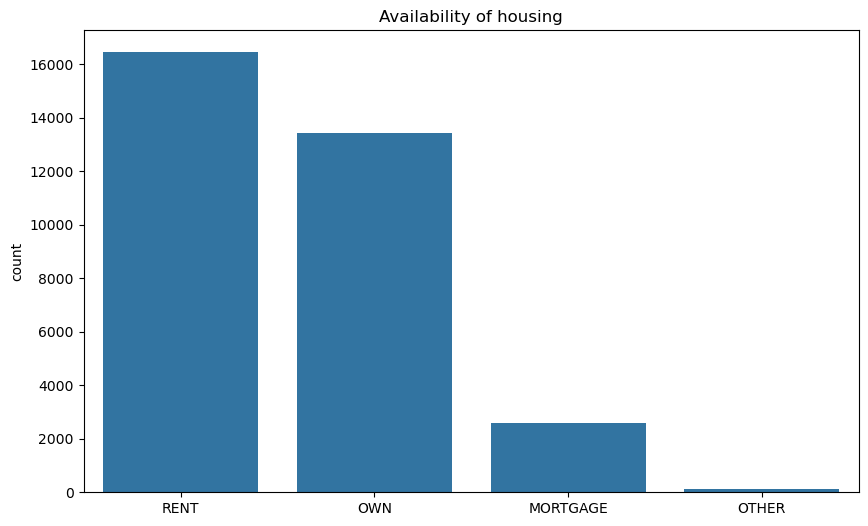

In [80]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['person_home_ownership'].unique(), y=df['person_home_ownership'].value_counts())
plt.title('Availability of housing')
plt.show()

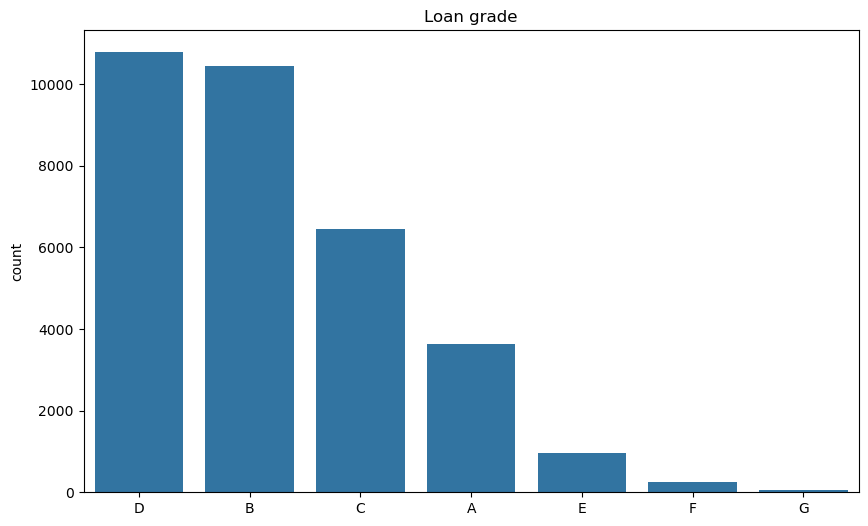

In [84]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['loan_grade'].unique(), y=df['loan_grade'].value_counts())
plt.title('Loan grade')
plt.show()

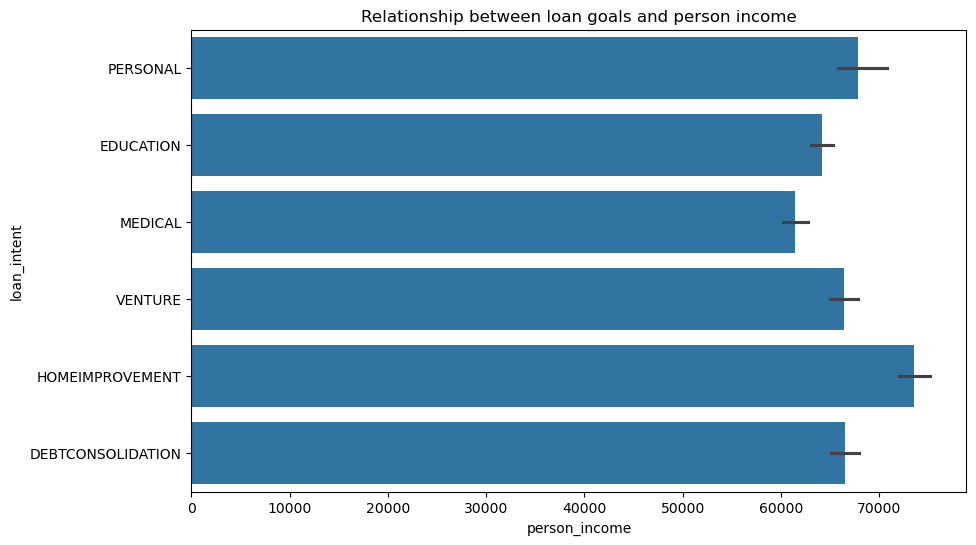

In [86]:
plt.figure(figsize=(10,6))
sns.barplot(x=df["person_income"],y=df["loan_intent"])
plt.title("Relationship between loan goals and person income")
plt.show()

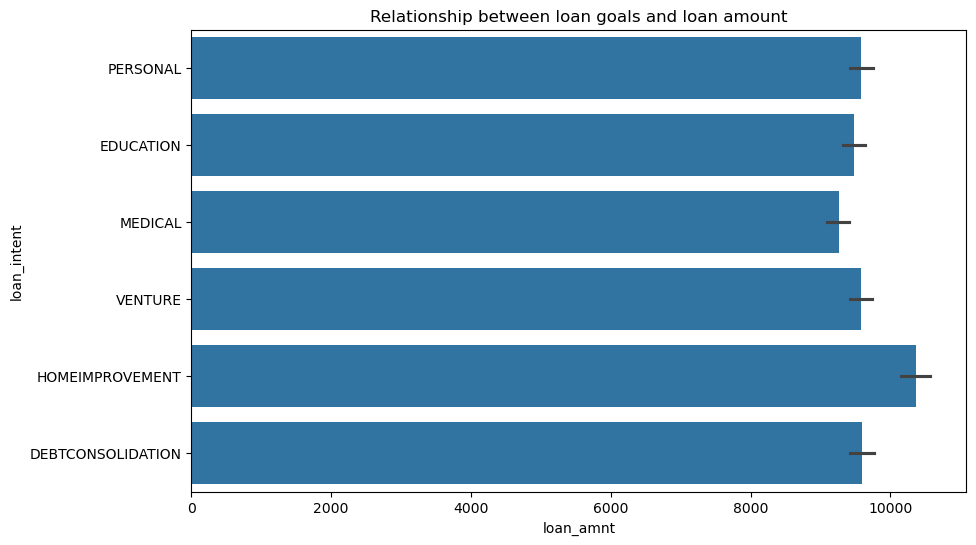

In [88]:
plt.figure(figsize=(10,6))
sns.barplot(x=df["loan_amnt"],y=df["loan_intent"])
plt.title("Relationship between loan goals and loan amount")
plt.show()

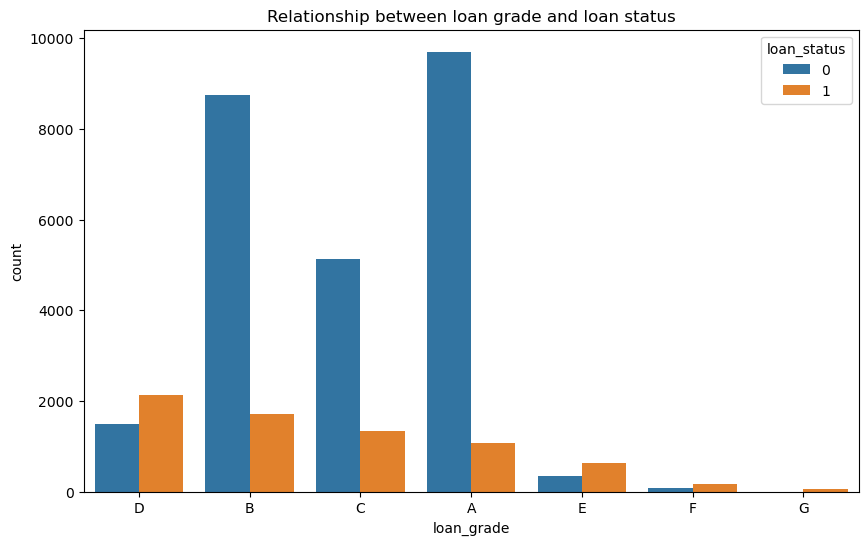

In [90]:
plt.figure(figsize=(10,6))
sns.countplot(data = df, x = 'loan_grade', hue = 'loan_status')
plt.title("Relationship between loan grade and loan status")
plt.show()

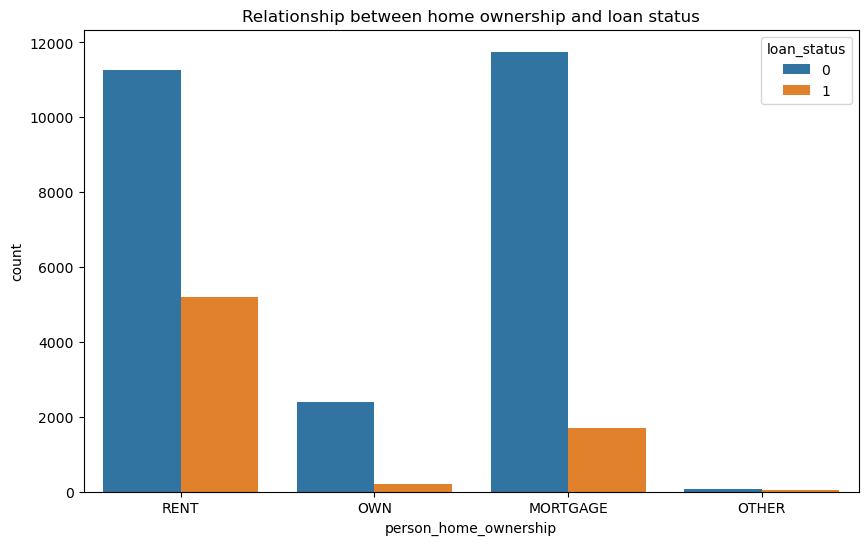

In [92]:
plt.figure(figsize=(10,6))
sns.countplot(data = df, x = 'person_home_ownership', hue = 'loan_status')
plt.title("Relationship between home ownership and loan status")
plt.show()

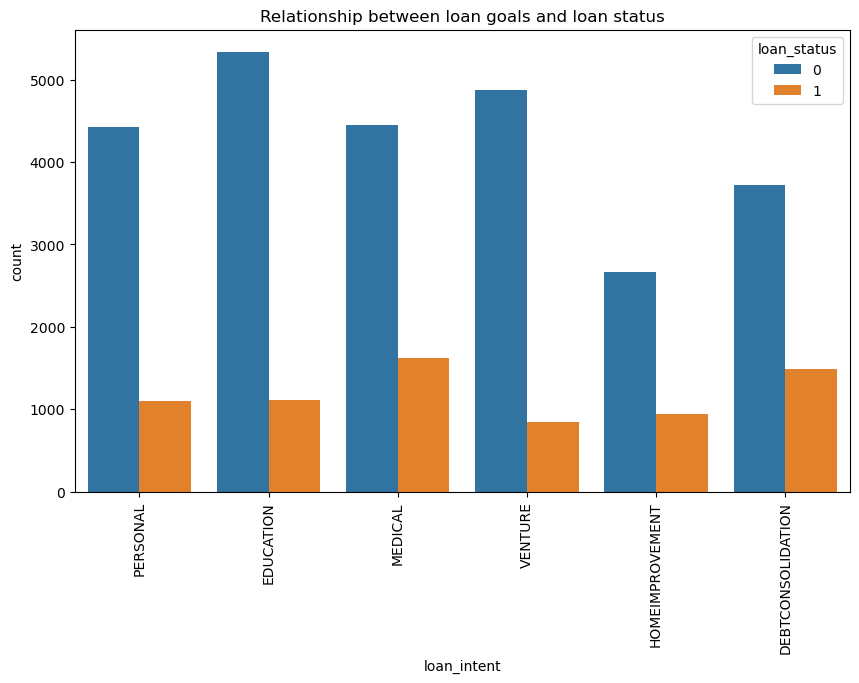

In [106]:
plt.figure(figsize=(10,6))
sns.countplot(data = df, x = 'loan_intent', hue = 'loan_status')
plt.xticks(rotation=90)
plt.title("Relationship between loan goals and loan status")
plt.show()

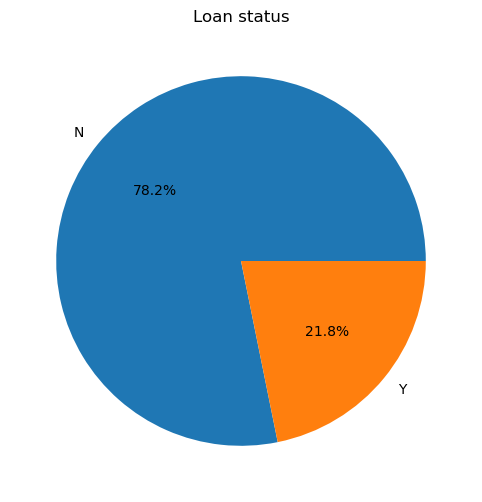

In [102]:
plt.figure(figsize=(10,6))
plt.pie(df['loan_status'].value_counts(), labels=['N', 'Y'], autopct='%1.1f%%')
plt.title("Loan status")
plt.show()

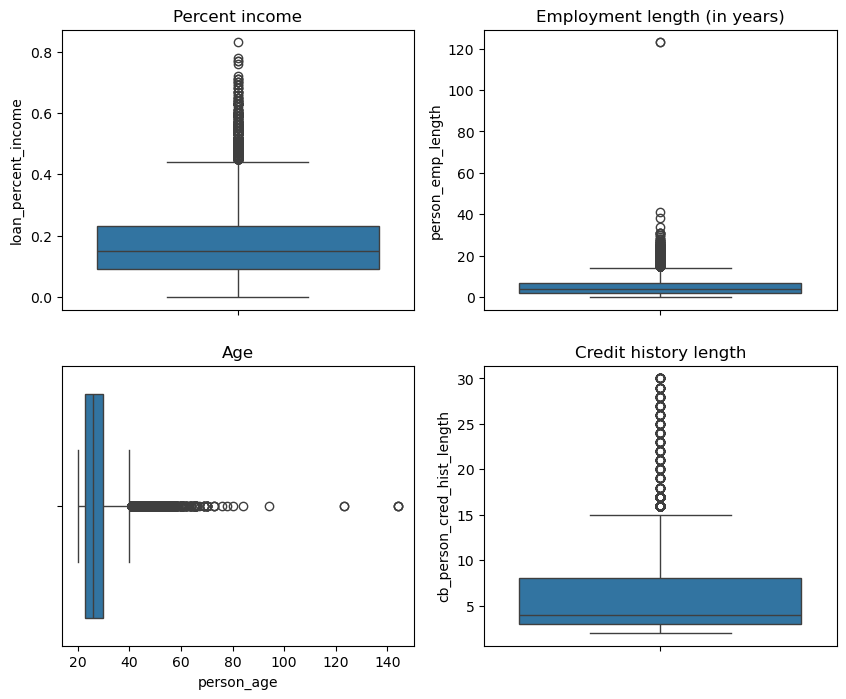

In [108]:
fig, axes = plt.subplots(2, 2,figsize=(10,8))

axes[0,0].set_title("Percent income")
axes[0,1].set_title('Employment length (in years)')
axes[1,0].set_title('Age')
axes[1,1].set_title('Credit history length')

sns.boxplot(ax=axes[0,0], data=df['loan_percent_income'], orient='v')
sns.boxplot(ax=axes[0,1], data=df['person_emp_length'], orient='v')
sns.boxplot(ax=axes[1,0], data=df['person_age'], orient='h')
sns.boxplot(ax=axes[1,1], data=df['cb_person_cred_hist_length'], orient='v')
plt.show()

# Data Preprocessing

In [111]:
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [113]:
df.duplicated().sum()

165

In [115]:
df = df.drop(df[df['person_age'] > 100].index)

In [117]:
ord_enc = OrdinalEncoder()

df['person_home_ownership'] = ord_enc.fit_transform(df[['person_home_ownership']])
df['loan_intent'] = ord_enc.fit_transform(df[['loan_intent']])
df['loan_grade'] = ord_enc.fit_transform(df[['loan_grade']])
df['cb_person_default_on_file'] = ord_enc.fit_transform(df[['cb_person_default_on_file']])

In [119]:
df.drop_duplicates(inplace=True)

<Axes: >

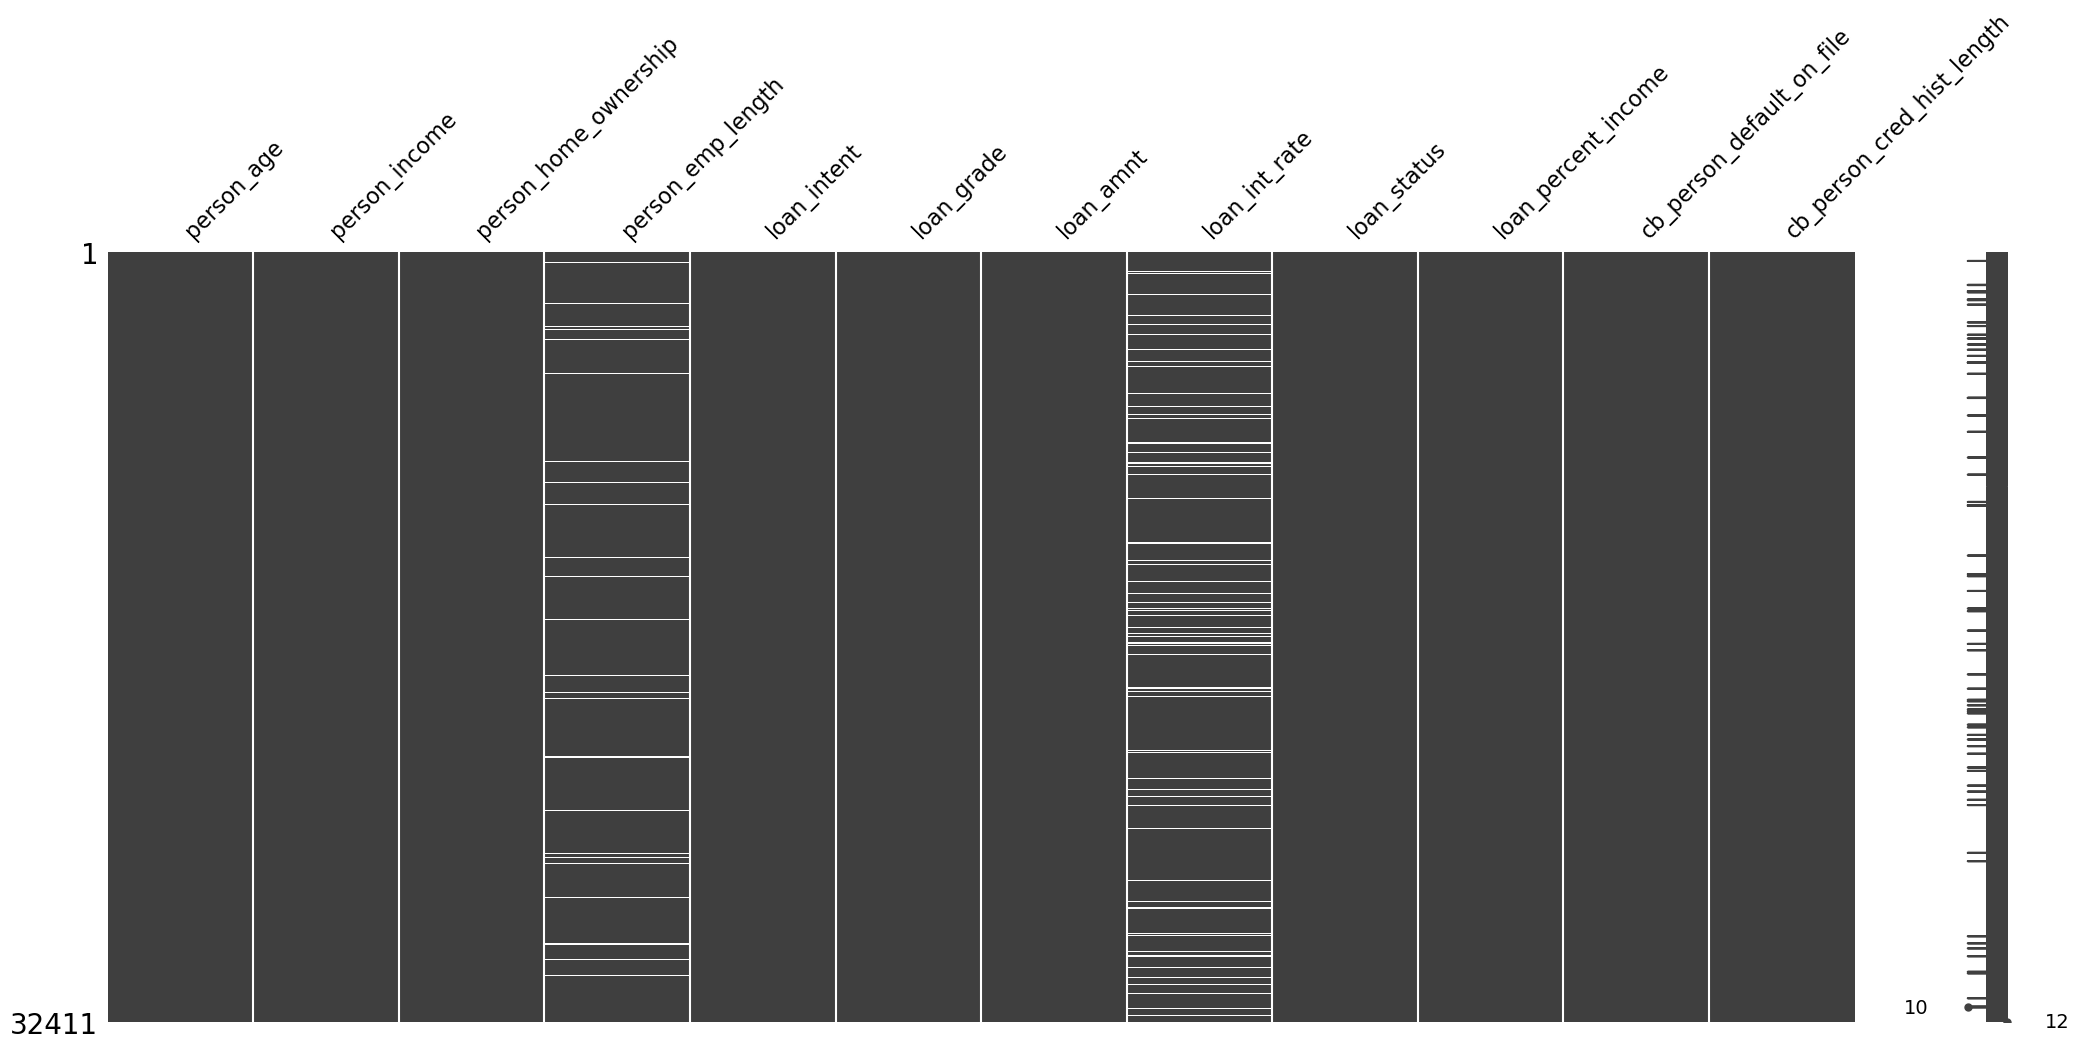

In [121]:
msno.matrix(df)

<Axes: >

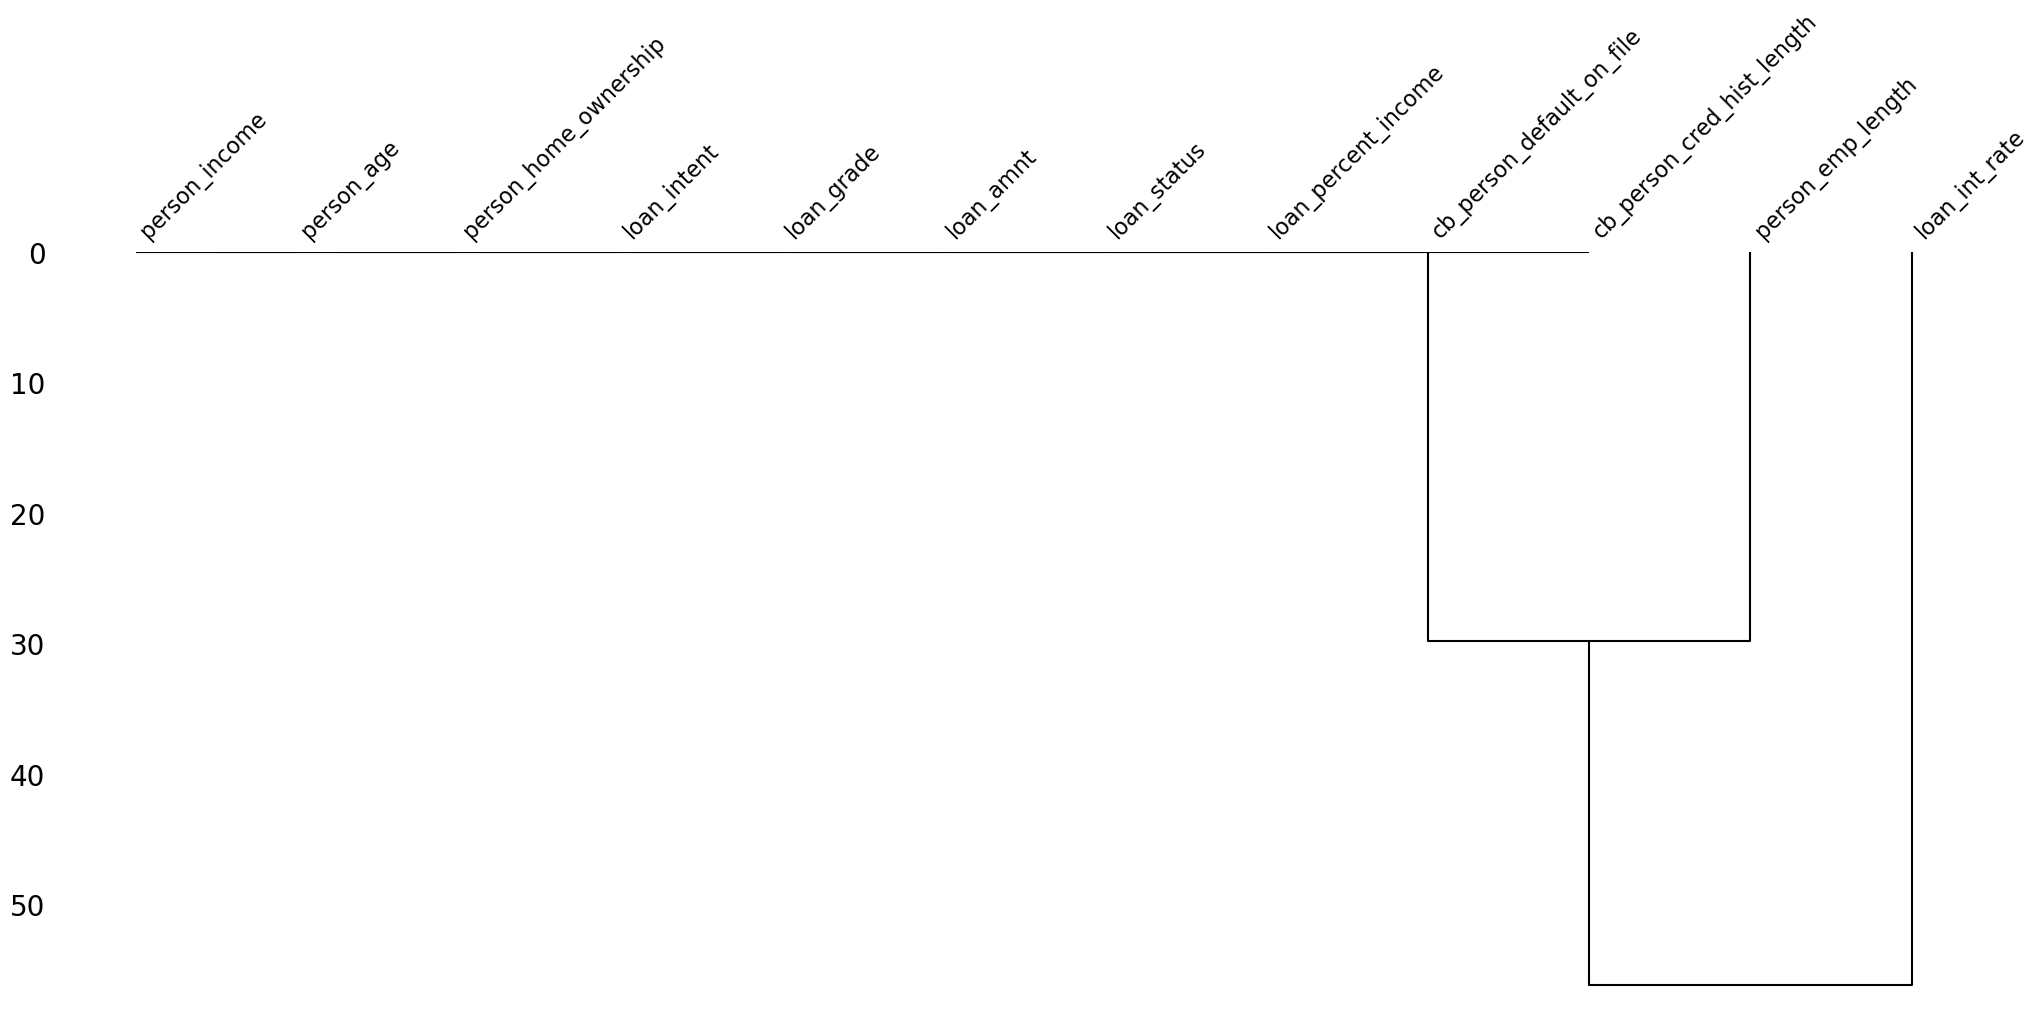

In [123]:
msno.dendrogram(df)

In [125]:
df1 = df.copy()
df1['person_emp_length'] = df1['person_emp_length'].fillna(df1['person_emp_length'].mean())

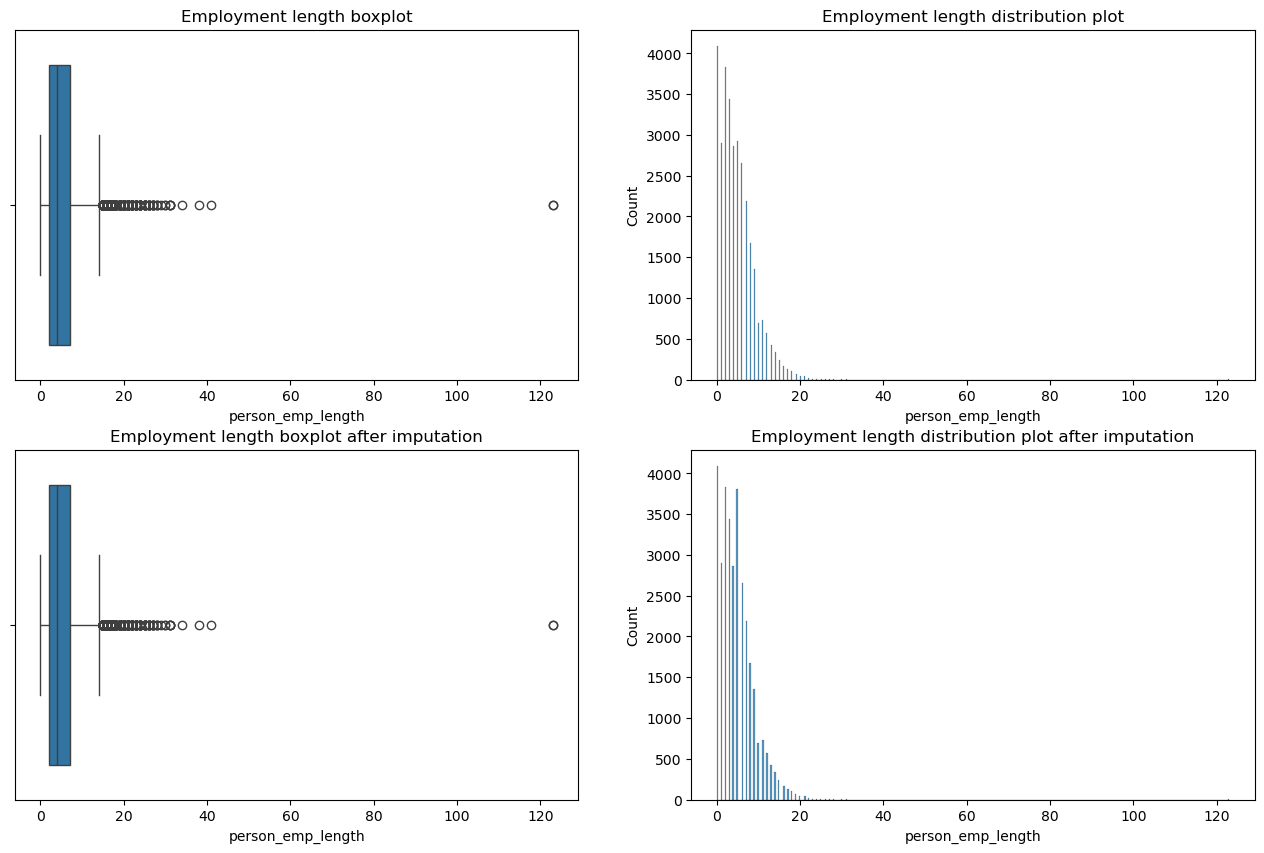

In [127]:
fig, axes = plt.subplots(2, 2,figsize=(16,10))

axes[0,0].set_title('Employment length boxplot')
axes[0,1].set_title('Employment length distribution plot')
axes[1,0].set_title('Employment length boxplot after imputation')
axes[1,1].set_title('Employment length distribution plot after imputation')

sns.boxplot(ax=axes[0,0], data=df['person_emp_length'], orient='h')
sns.histplot(ax=axes[0,1], data=df['person_emp_length'])
sns.boxplot(ax=axes[1,0], data=df1['person_emp_length'], orient='h')
sns.histplot(ax=axes[1,1], data=df1['person_emp_length'])

plt.show()

In [129]:
df = df1

In [131]:
X = df.drop(columns='loan_status')
y = df['loan_status']

imp = KNNImputer(n_neighbors=5)
X_imp = imp.fit_transform(X)

In [133]:
X1 = pd.DataFrame(X_imp, columns=X.columns)

In [135]:
X1.shape

(32411, 11)

In [139]:
X.shape

(32411, 11)

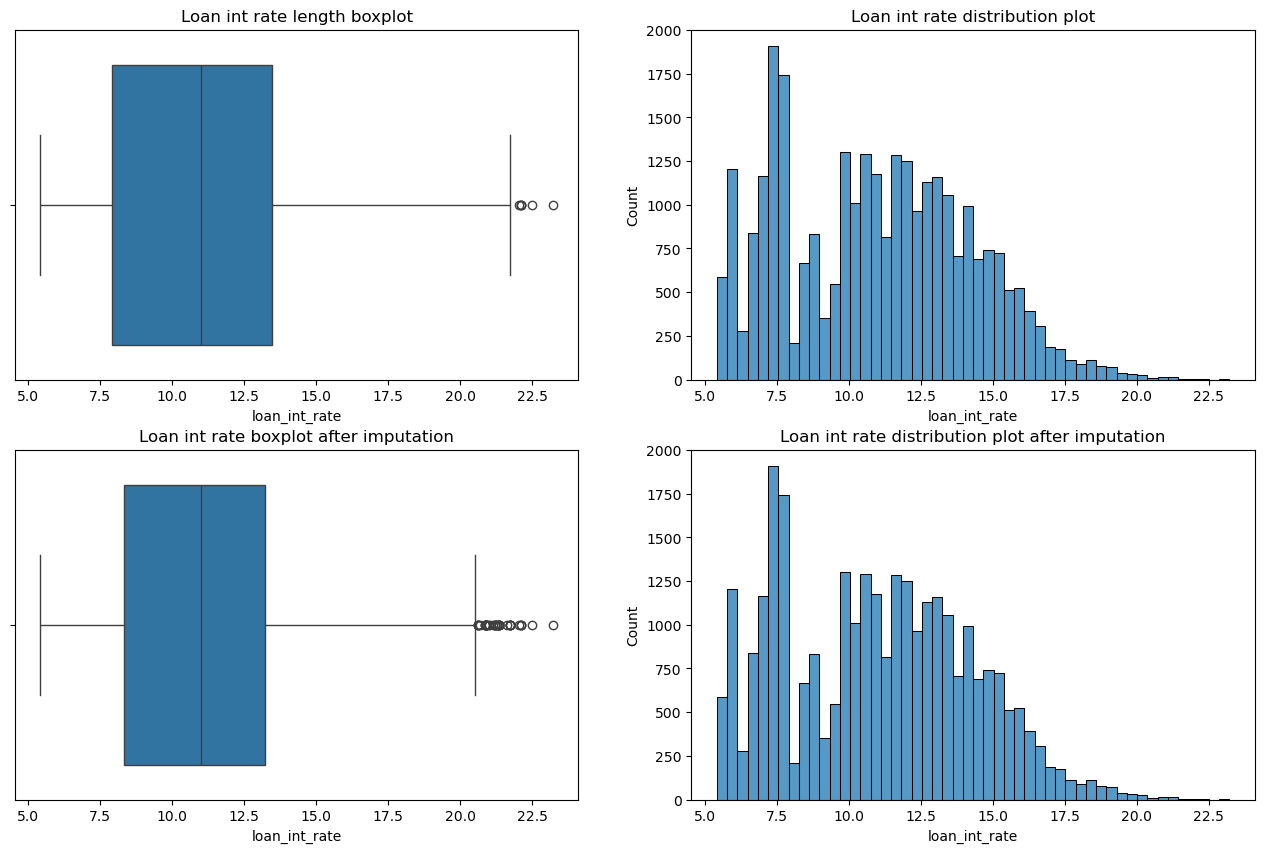

In [141]:
fig, axes = plt.subplots(2, 2,figsize=(16,10))

axes[0,0].set_title('Loan int rate length boxplot')
axes[0,1].set_title('Loan int rate distribution plot')
axes[1,0].set_title('Loan int rate boxplot after imputation')
axes[1,1].set_title('Loan int rate distribution plot after imputation')

sns.boxplot(ax=axes[0,0], data=X['loan_int_rate'], orient='h')
sns.histplot(ax=axes[0,1], data=X['loan_int_rate'])
sns.boxplot(ax=axes[1,0], data=X1['loan_int_rate'], orient='h')
sns.histplot(ax=axes[1,1], data=X['loan_int_rate'])

plt.show()

In [143]:
X = X1

In [145]:
X.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [147]:
X.describe()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
count,32411.000000,3.241100e+04,32411.000000,32411.000000,32411.000000,32411.000000,32411.000000,32411.000000,32411.000000,32411.000000,32411.000000
mean,27.730369,6.589796e+04,1.677116,4.790350,2.533430,1.220481,9593.591682,11.015307,0.170259,0.176792,5.811052
std,6.210448,5.252093e+04,1.433177,4.088445,1.730826,1.167365,6322.529723,3.127206,0.106808,0.381498,4.057816
min,20.000000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,0.000000,2.000000,1.000000,0.000000,5000.000000,8.320000,0.090000,0.000000,3.000000
50%,26.000000,5.500000e+04,3.000000,4.000000,3.000000,1.000000,8000.000000,10.990000,0.150000,0.000000,4.000000
75%,30.000000,7.920000e+04,3.000000,7.000000,4.000000,2.000000,12250.000000,13.228000,0.230000,0.000000,8.000000
max,94.000000,2.039784e+06,3.000000,123.000000,5.000000,6.000000,35000.000000,23.220000,0.830000,1.000000,30.000000


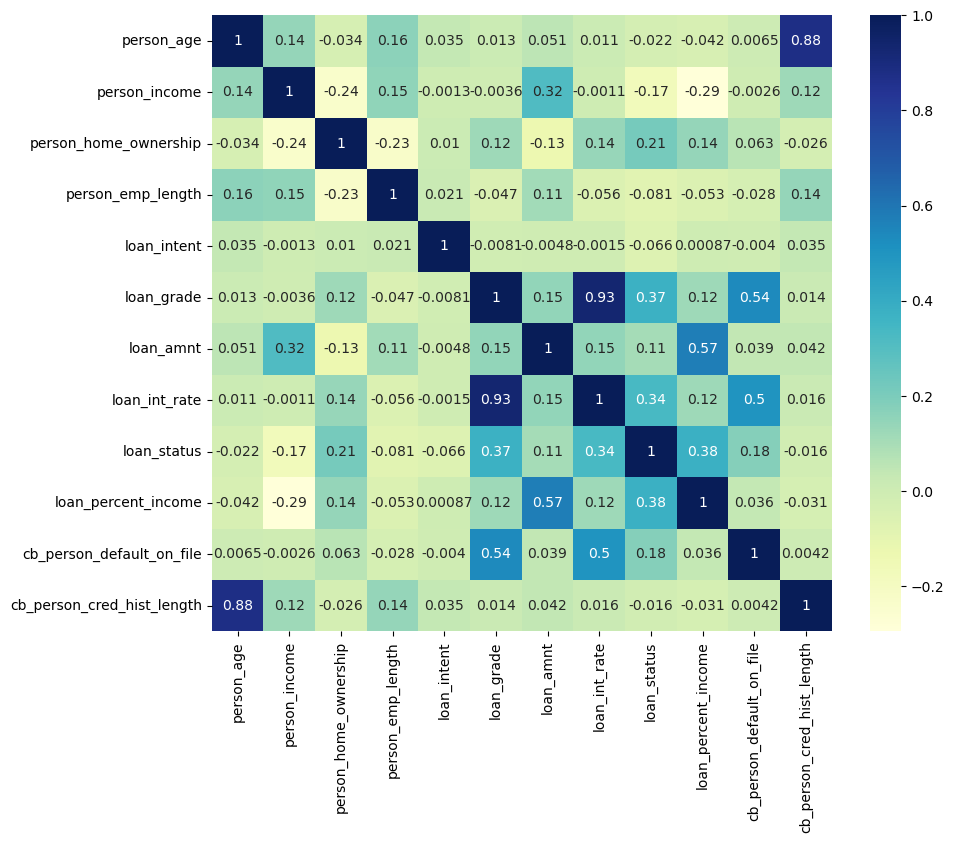

In [181]:
plt.figure(figsize=(10,8))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

# Model training

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [186]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [188]:
def print_metrics(model, y_pred, y_prob):
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    report = classification_report(y_test, y_pred)
    
    print(report)
    
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      5080
           1       0.72      0.45      0.55      1403

    accuracy                           0.84      6483
   macro avg       0.79      0.70      0.73      6483
weighted avg       0.83      0.84      0.83      6483



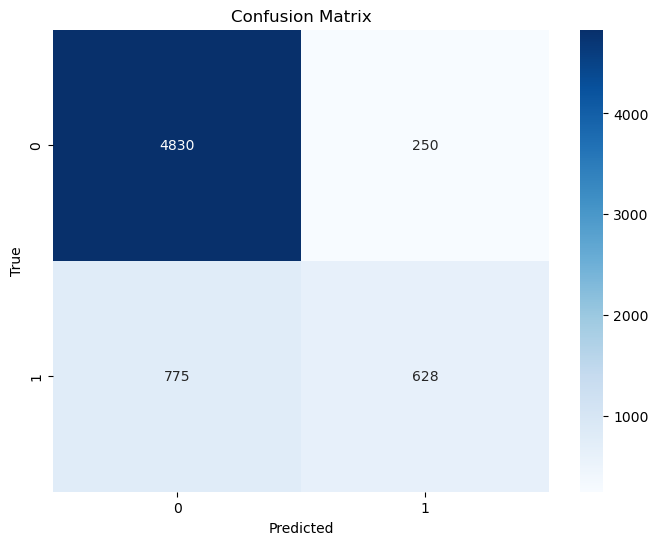

In [190]:
log_reg = LogisticRegression(max_iter=1000)

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1] 

print_metrics(log_reg, y_pred, y_prob)

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      5080
           1       0.72      0.76      0.74      1403

    accuracy                           0.88      6483
   macro avg       0.83      0.84      0.83      6483
weighted avg       0.89      0.88      0.88      6483



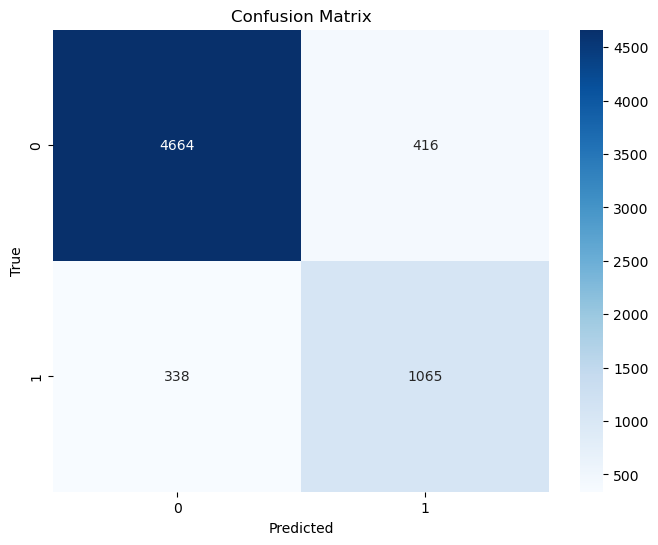

In [192]:
decision_tree = DecisionTreeClassifier()

decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)
y_prob = decision_tree.predict_proba(X_test)[:, 1] 

print_metrics(decision_tree, y_pred, y_prob)

              precision    recall  f1-score   support

           0       0.92      0.99      0.96      5080
           1       0.97      0.70      0.82      1403

    accuracy                           0.93      6483
   macro avg       0.95      0.85      0.89      6483
weighted avg       0.93      0.93      0.93      6483



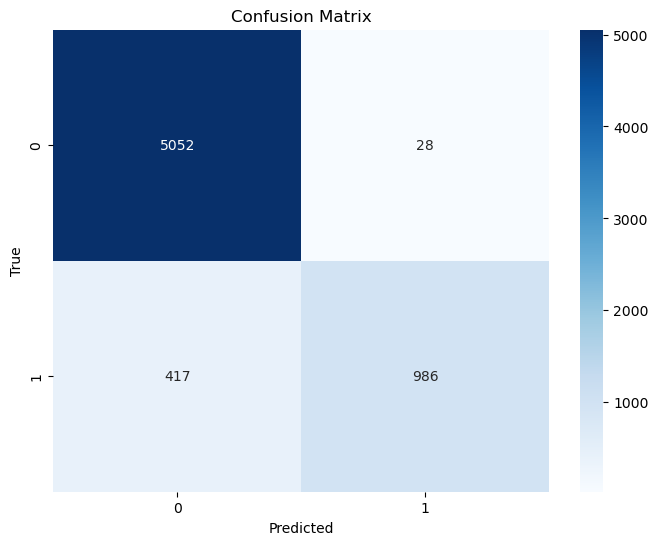

In [194]:
random_forest = RandomForestClassifier()

random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)
y_prob = random_forest.predict_proba(X_test)[:, 1] 

print_metrics(random_forest, y_pred, y_prob)

              precision    recall  f1-score   support

           0       0.92      0.99      0.96      5080
           1       0.95      0.70      0.81      1403

    accuracy                           0.93      6483
   macro avg       0.94      0.85      0.88      6483
weighted avg       0.93      0.93      0.92      6483



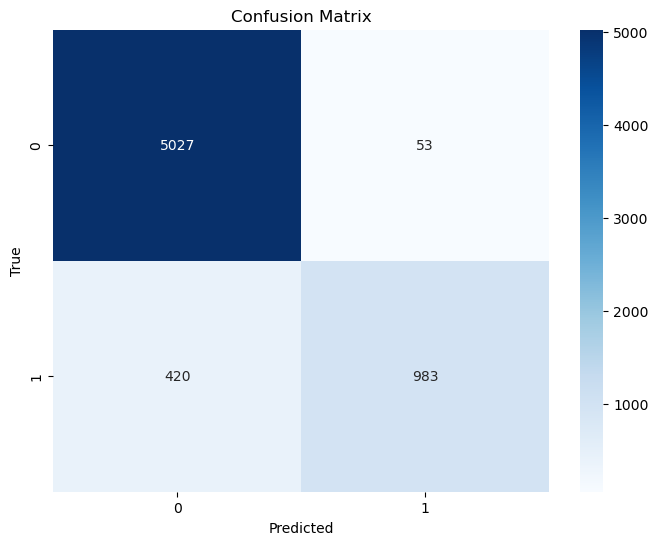

In [196]:
gradient_boosting = GradientBoostingClassifier()

gradient_boosting.fit(X_train, y_train)

y_pred = gradient_boosting.predict(X_test)
y_prob = gradient_boosting.predict_proba(X_test)[:, 1] 

print_metrics(gradient_boosting, y_pred, y_prob)

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      5080
           1       0.87      0.54      0.66      1403

    accuracy                           0.88      6483
   macro avg       0.88      0.76      0.80      6483
weighted avg       0.88      0.88      0.87      6483



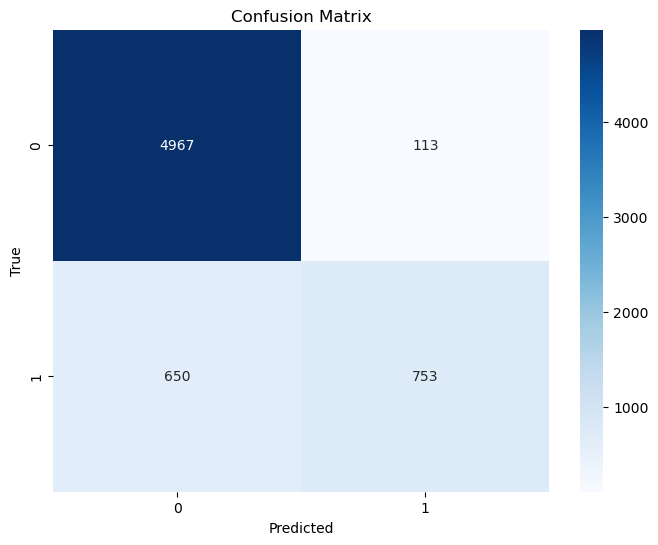

In [198]:
KNC = KNeighborsClassifier(n_neighbors=6)
KNC.fit(X_train, y_train)

y_pred = KNC.predict(X_test)
y_prob = KNC.predict_proba(X_test)[:, 1] 

print_metrics(KNC, y_pred, y_prob)

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      5080
           1       0.52      0.62      0.57      1403

    accuracy                           0.80      6483
   macro avg       0.71      0.73      0.72      6483
weighted avg       0.81      0.80      0.80      6483



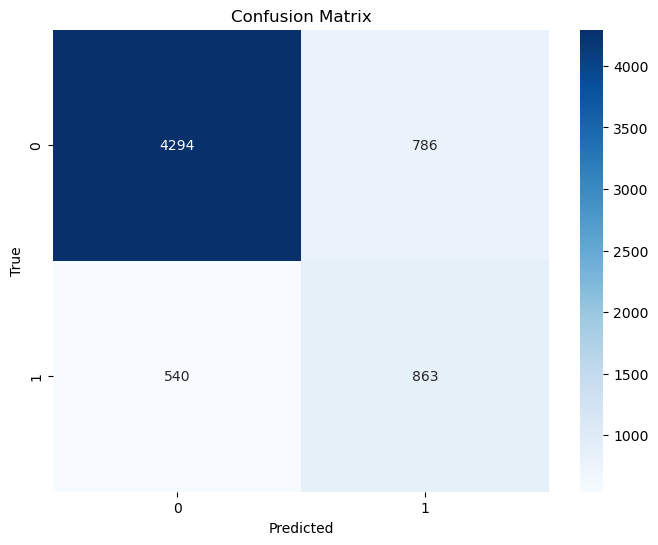

In [200]:
GNB = GaussianNB()
GNB.fit(X_train, y_train)

y_pred = GNB.predict(X_test)
y_prob = GNB.predict_proba(X_test)[:, 1] 

print_metrics(GNB, y_pred, y_prob)

C:\Users\parth\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.91      0.95      0.93      5080
           1       0.79      0.66      0.72      1403

    accuracy                           0.89      6483
   macro avg       0.85      0.81      0.82      6483
weighted avg       0.88      0.89      0.88      6483



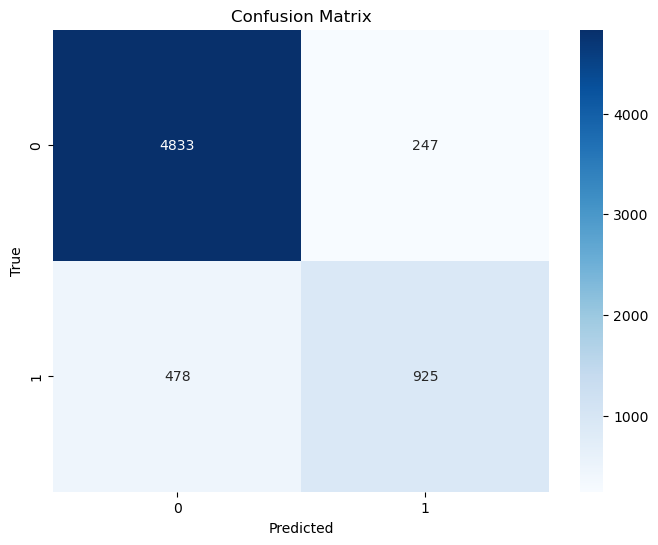

In [202]:
ABC = AdaBoostClassifier(n_estimators=100)

ABC.fit(X_train, y_train)

y_pred = ABC.predict(X_test)
y_prob = ABC.predict_proba(X_test)[:, 1] 

print_metrics(ABC, y_pred, y_prob)